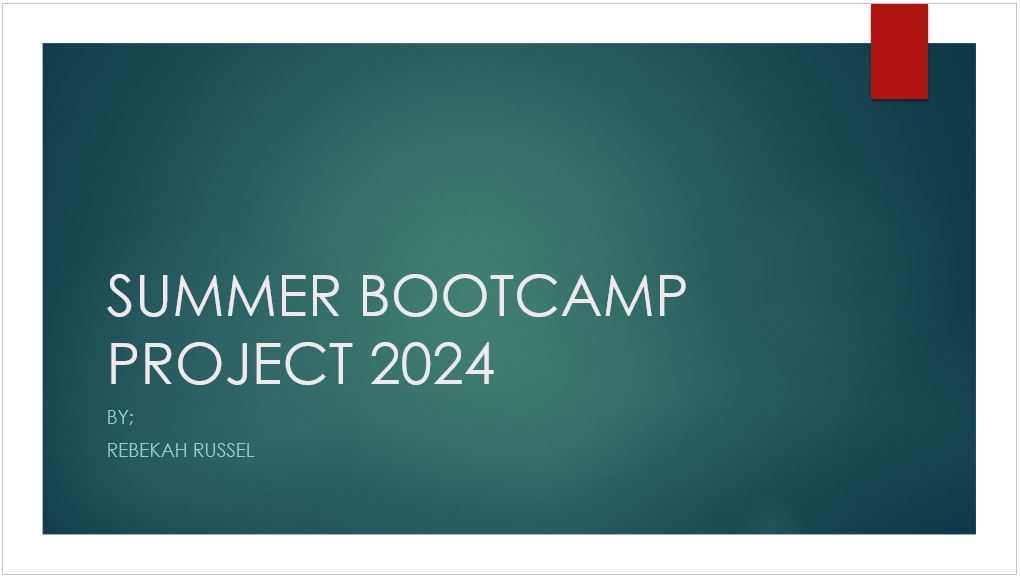

## Index

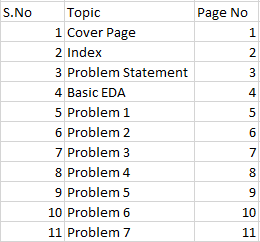

## Problem statement/Objective

The Objective of this analysis is to gain insights into the characteristics of the wholesale data and answer key questions related to the wholesale.By understanding the data,we aim to inform strategies for improving the quality of data analysis and enhancing the overall customer satisfaction.The analysis will provide valuable insights and recommendations for stakeholders in the business sector

Data Description

* Buyer/Spender- ID's of customers
* Region- Region of the distributor
* Fresh- spending on Fresh Vegetables
* Milk- spending on milk
* Grocery- spending on grocery
* Frozen- spending on frozen food
* Detergents_paper- spending on detergents and toilet paper
* Delicatessen- spending on instant foods

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [2]:
import os
os.getcwd()

'C:\\Users\\A.S COMPUTER'

In [3]:
df=pd.read_csv("4-Wholesale Customer_New.csv")

# Basic Steps

## 1.Display the five top rows

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


## 2.Display the last 5 rows

In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


## 3.Display the shape of the Dataset

In [6]:
df.shape

(440, 9)

## 4.Check the datatype of each feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer/Spender     440 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            434 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            437 non-null    float64
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      438 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 31.1+ KB


### Observations: The "Fresh"- spending on Fresh Vegetables is object instead of a numerical value

In [8]:
# Step 1: Replace '?' with NaN
df['Fresh'] = df['Fresh'].replace('?', np.nan)

# Step 2: Convert 'Fresh' column to numeric, setting errors='coerce'
df['Fresh'] = pd.to_numeric(df['Fresh'], errors='coerce')

# Step 3: Handle NaN values
# Fill NaN values with a specific value (e.g., 0)
df['Fresh'] = df['Fresh'].fillna(0)

# Step 4: Convert 'Fresh' column to integers
df['Fresh'] = df['Fresh'].astype('int64')
print(df)


     Buyer/Spender Channel Region  Fresh   Milk  Grocery   Frozen  \
0                1  Retail  Other  12669   9656     7561    214.0   
1                2  Retail  Other   7057   9810     9568   1762.0   
2                3  Retail  Other      0   8808     7684   2405.0   
3                4   Hotel  Other  13265   1196     4221   6404.0   
4                5  Retail  Other  22615   5410     7198   3915.0   
..             ...     ...    ...    ...    ...      ...      ...   
435            436   Hotel  Other  29703  12051    16027  13135.0   
436            437   Hotel  Other  39228   1431      764   4510.0   
437            438  Retail  Other  14531  15488    30243    437.0   
438            439   Hotel  Other  10290   1981     2232   1038.0   
439            440   Hotel  Other   2787   1698     2510     65.0   

     Detergents_Paper  Delicatessen  
0              2674.0        1338.0  
1              3293.0        1776.0  
2              3516.0        7844.0  
3               507

## 5.Check the statistical summary

In [9]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,11961.390909,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,12670.176084,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,0.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3094.500000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,8413.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,16933.750000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112151.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


## 6.Check the null values

In [10]:
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

## 7.Check the Duplicate Values

In [11]:
df.duplicated().sum()

0

## 8.Check the anomalies or wrong entities

In [12]:
df['Frozen'].unique().sum()

nan

In [13]:
df['Frozen'].value_counts()

1285.0    2
4324.0    2
364.0     2
824.0     2
402.0     2
         ..
8425.0    1
2995.0    1
321.0     1
2279.0    1
65.0      1
Name: Frozen, Length: 424, dtype: int64

In [14]:
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [15]:
df['Fresh']=df['Fresh'].replace('?',np.nan)

In [16]:
df[df['Fresh']=='?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


## 9.Check the outliers and the authenticity

<Axes: >

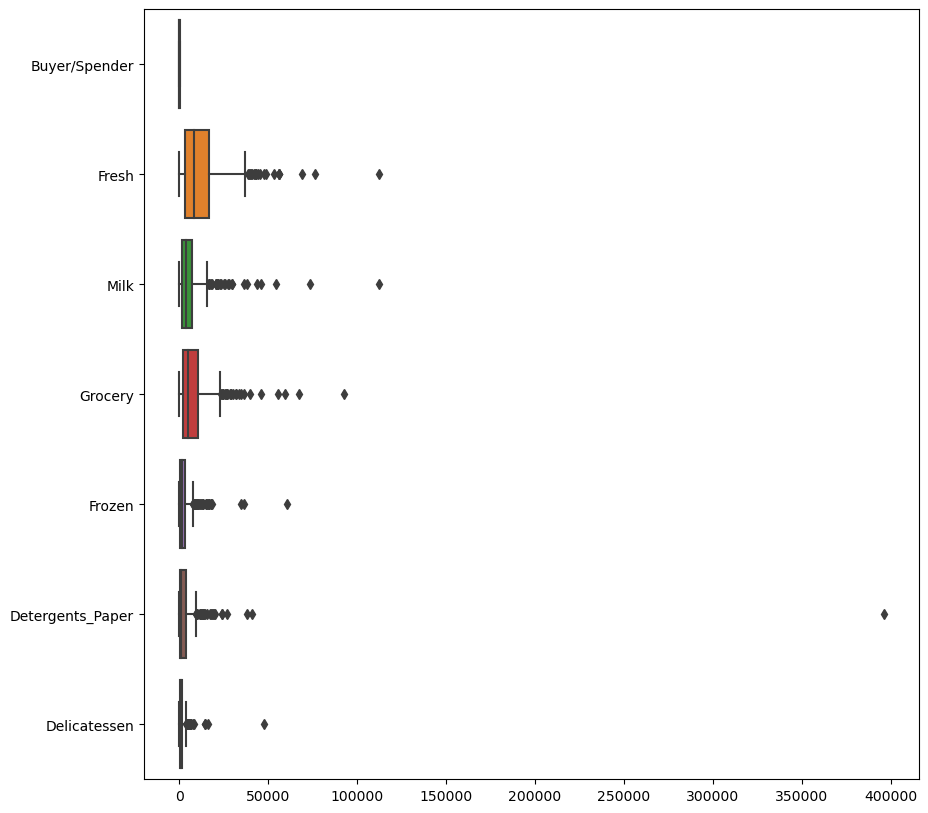

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.boxplot(data=df, orient='h')


## 10.Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

* Dropping Duplicates,unnecessary columns

In [18]:
#Dropping unnecessary columns
data = df.drop('Region', axis=1)
df.drop_duplicates(inplace=True)

* null value imputation

In [19]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

character_columns = df.select_dtypes(include=['object']).columns
df[character_columns] = df[character_columns].fillna(df[character_columns].mode().iloc[0])


In [20]:
df.isna().sum()#checking again for any null values

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

* Outlier treatment

<Axes: >

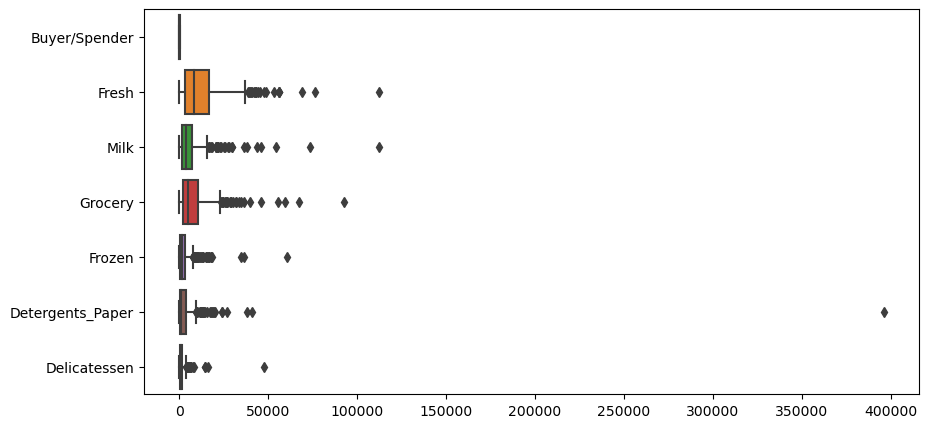

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient='h')

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

<Axes: >

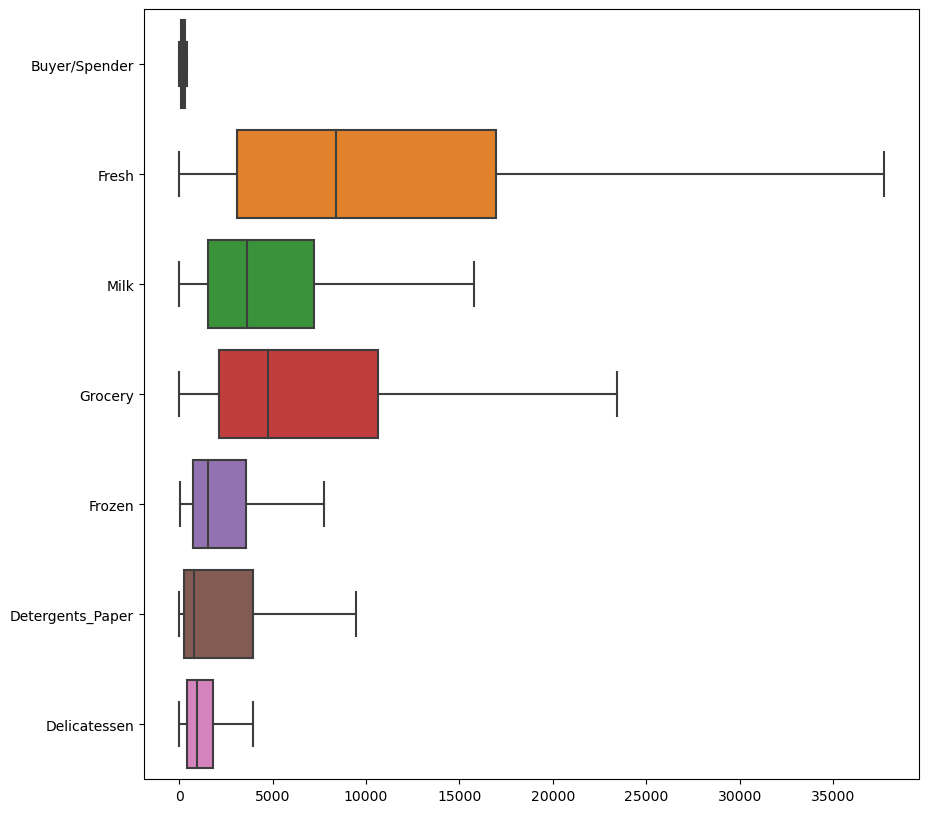

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, orient='h')


## 1.Spending Analysis

* What is the total number of buyers in the dataset?

In [24]:
total_buyers = df.shape[0]
print("Total number of buyers:", total_buyers)

Total number of buyers: 440


* What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [25]:
average_spending = df[numeric_columns].mean(axis=0)

print(average_spending)

Buyer/Spender         220.500000
Fresh               11320.928409
Milk                 5073.405966
Grocery              7236.375000
Frozen               2518.007194
Detergents_Paper     2407.901414
Delicatessen         1272.579805
dtype: float64


* Which category has the highest average spending?

In [26]:
average_spending_per_category = df.groupby('Channel')['Grocery'].mean()
highest_average_spending_category = average_spending_per_category.sort_values(ascending=False).index[0]
print(f"Category with the highest average spending: {highest_average_spending_category}")

Category with the highest average spending: Retail


* How many buyers spend above the average on Fresh Vegetables?

In [27]:
average_fresh_spending = df['Fresh'].mean()
num_buyers_above_average = len(df[df['Fresh'] > average_fresh_spending])
print(f"Number of buyers spending above average on Fresh Vegetables: {num_buyers_above_average}")


Number of buyers spending above average on Fresh Vegetables: 170


## 2.Regional Demand

*	What is the total spending in each region?

In [28]:
total_spending_by_region = df.groupby('Region').sum(numeric_only=True)
print(total_spending_by_region)

        Buyer/Spender        Fresh         Milk      Grocery         Frozen  \
Region                                                                        
Lisbon        17592.0   801804.875   373927.500   503807.500  204916.000000   
Oporto        13581.0   432343.000   217521.625   369848.625  101282.500000   
Other         65847.0  3747060.625  1640849.500  2310348.875  801724.665332   

        Detergents_Paper   Delicatessen  
Region                                   
Lisbon     168691.750000   93136.000000  
Oporto     129927.750000   48992.000000  
Other      760857.122153  417807.114155  


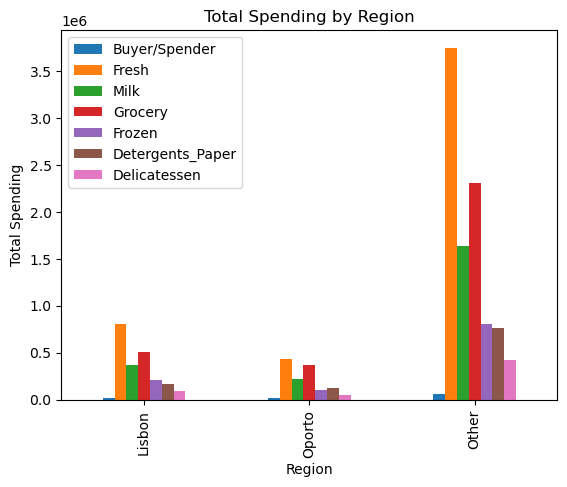

In [29]:
#visualizing the total spending by region
total_spending_by_region.plot(kind='bar')

plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')

plt.show()

<Figure size 1000x600 with 0 Axes>

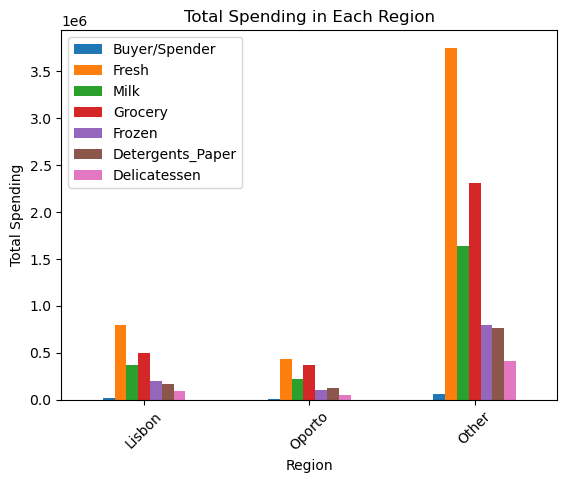

In [30]:
# Create a bar chart to visualize total spending in each region
plt.figure(figsize=(10, 6))
total_spending_by_region.plot(kind='bar')

# Add title and labels
plt.title('Total Spending in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')

plt.xticks(rotation=45)

plt.show()

* Which region has the highest spending on Milk?

In [31]:
highest_milk_spending_region = df.groupby('Region')['Milk'].mean().sort_values(ascending=False).index[0]
print(f"Region with the highest spending on Milk: {highest_milk_spending_region}")


Region with the highest spending on Milk: Other


* How does the average spending on Grocery vary across different regions? 

In [32]:
average_grocery_spending_by_region = df.groupby('Region')['Grocery'].mean()
print(average_grocery_spending_by_region)


Region
Lisbon    6717.433333
Oporto    8601.130814
Other     7174.996506
Name: Grocery, dtype: float64


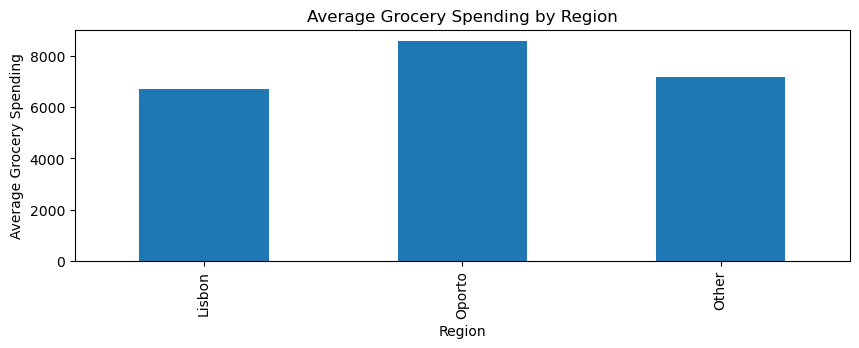

In [33]:
plt.figure(figsize=(10, 3))
average_grocery_spending_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Grocery Spending')
plt.title('Average Grocery Spending by Region')
plt.show()


* Which region has the highest average spending per buyer?

In [34]:
average_spending_by_region = df.groupby('Region').mean(numeric_only=True)
highest_average_spending_region = average_spending_by_region.sort_values(by='Buyer/Spender', ascending=False).index[0]
print(f"Region with highest average spending per buyer: {highest_average_spending_region}")

Region with highest average spending per buyer: Oporto


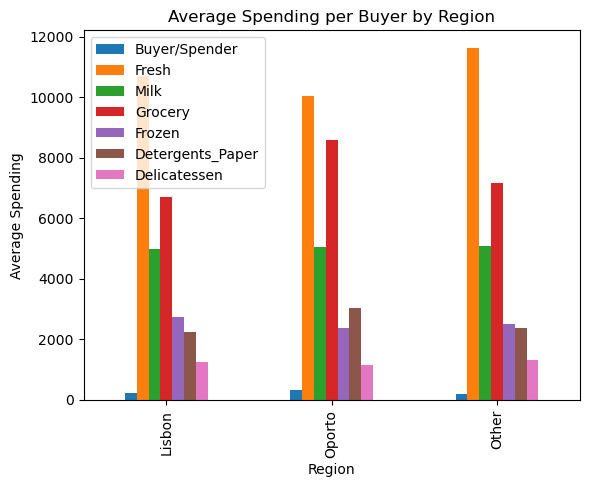

In [35]:
average_spending_by_region.plot(kind='bar')

plt.title('Average Spending per Buyer by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending')

plt.show()

## 3.Category Preferences

* What percentage of buyers spend more on Frozen food compared to Delicatessen?

In [36]:
total_buyers = len(df)

num_buyers_more_frozen = len(df[df['Frozen'] > df['Delicatessen']])

percentage_buyers_more_frozen = (num_buyers_more_frozen / total_buyers) * 100

print(f"Percentage of buyers spending more on Frozen compared to Delicatessen: {percentage_buyers_more_frozen:.2f}%")

Percentage of buyers spending more on Frozen compared to Delicatessen: 65.91%


* Which category shows the most variation in spending among buyers?

In [37]:
variability_by_category = data.var(axis=0,numeric_only=True)
highest_variance_category = variability_by_category.idxmax()

print(f"Category with the most spending variation: {highest_variance_category}")

Category with the most spending variation: Detergents_Paper


* 	Are there any regions where spending on Detergents_paper is significantly higher than others?

In [38]:
avg_spending_by_region = df.groupby('Region')['Detergents_Paper'].mean()
region_with_highest_spending = avg_spending_by_region.idxmax()

# Calculate the difference in average spending between the highest and other regions
difference_in_spending = avg_spending_by_region[region_with_highest_spending] - avg_spending_by_region[avg_spending_by_region != avg_spending_by_region.max()]

print(f"Region with the highest average spending on Detergents_paper: {region_with_highest_spending}")
print(f"Difference in average spending compared to other regions:")
print(difference_in_spending)


Region with the highest average spending on Detergents_paper: Oporto
Difference in average spending compared to other regions:
Region
Lisbon    772.352248
Other     658.665264
Name: Detergents_Paper, dtype: float64


* What is the correlation between spending on Fresh and Frozen food?

In [39]:
correlation = df['Fresh'].corr(df['Frozen'])
print(f"Correlation between Fresh and Frozen spending: {correlation}")

Correlation between Fresh and Frozen spending: 0.35392762606930794


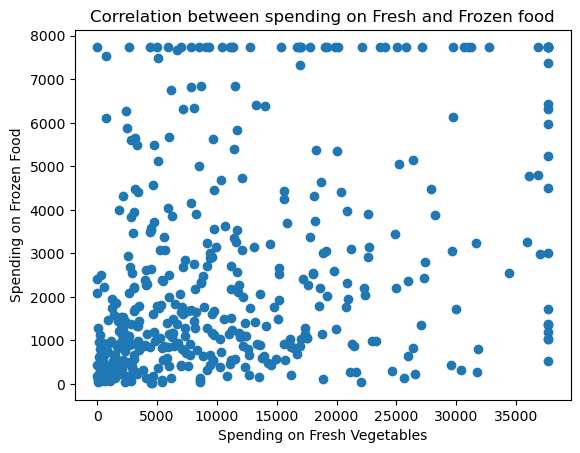

In [40]:
plt.scatter(df['Fresh'], df['Frozen'])
plt.xlabel('Spending on Fresh Vegetables')
plt.ylabel('Spending on Frozen Food')
plt.title('Correlation between spending on Fresh and Frozen food')
plt.show()

## 4.Customer Segmentation

* Can buyers be grouped into segments based on their spending patterns? (e.g., using clustering analysis)

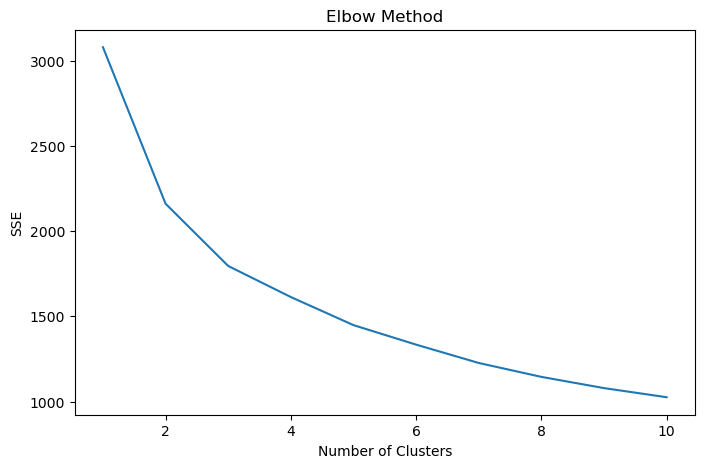

     Buyer/Spender Channel Region      Fresh     Milk    Grocery   Frozen  \
0              1.0  Retail  Other  12669.000   9656.0   7561.000   214.00   
1              2.0  Retail  Other   7057.000   9810.0   9568.000  1762.00   
2              3.0  Retail  Other      0.000   8808.0   7684.000  2405.00   
3              4.0   Hotel  Other  13265.000   1196.0   4221.000  6404.00   
4              5.0  Retail  Other  22615.000   5410.0   7198.000  3915.00   
..             ...     ...    ...        ...      ...        ...      ...   
435          436.0   Hotel  Other  29703.000  12051.0  16027.000  7743.75   
436          437.0   Hotel  Other  37692.625   1431.0    764.000  4510.00   
437          438.0  Retail  Other  14531.000  15488.0  23409.875   437.00   
438          439.0   Hotel  Other  10290.000   1981.0   2232.000  1038.00   
439          440.0   Hotel  Other   2787.000   1698.0   2510.000    65.00   

     Detergents_Paper  Delicatessen  Cluster  
0            2674.000       

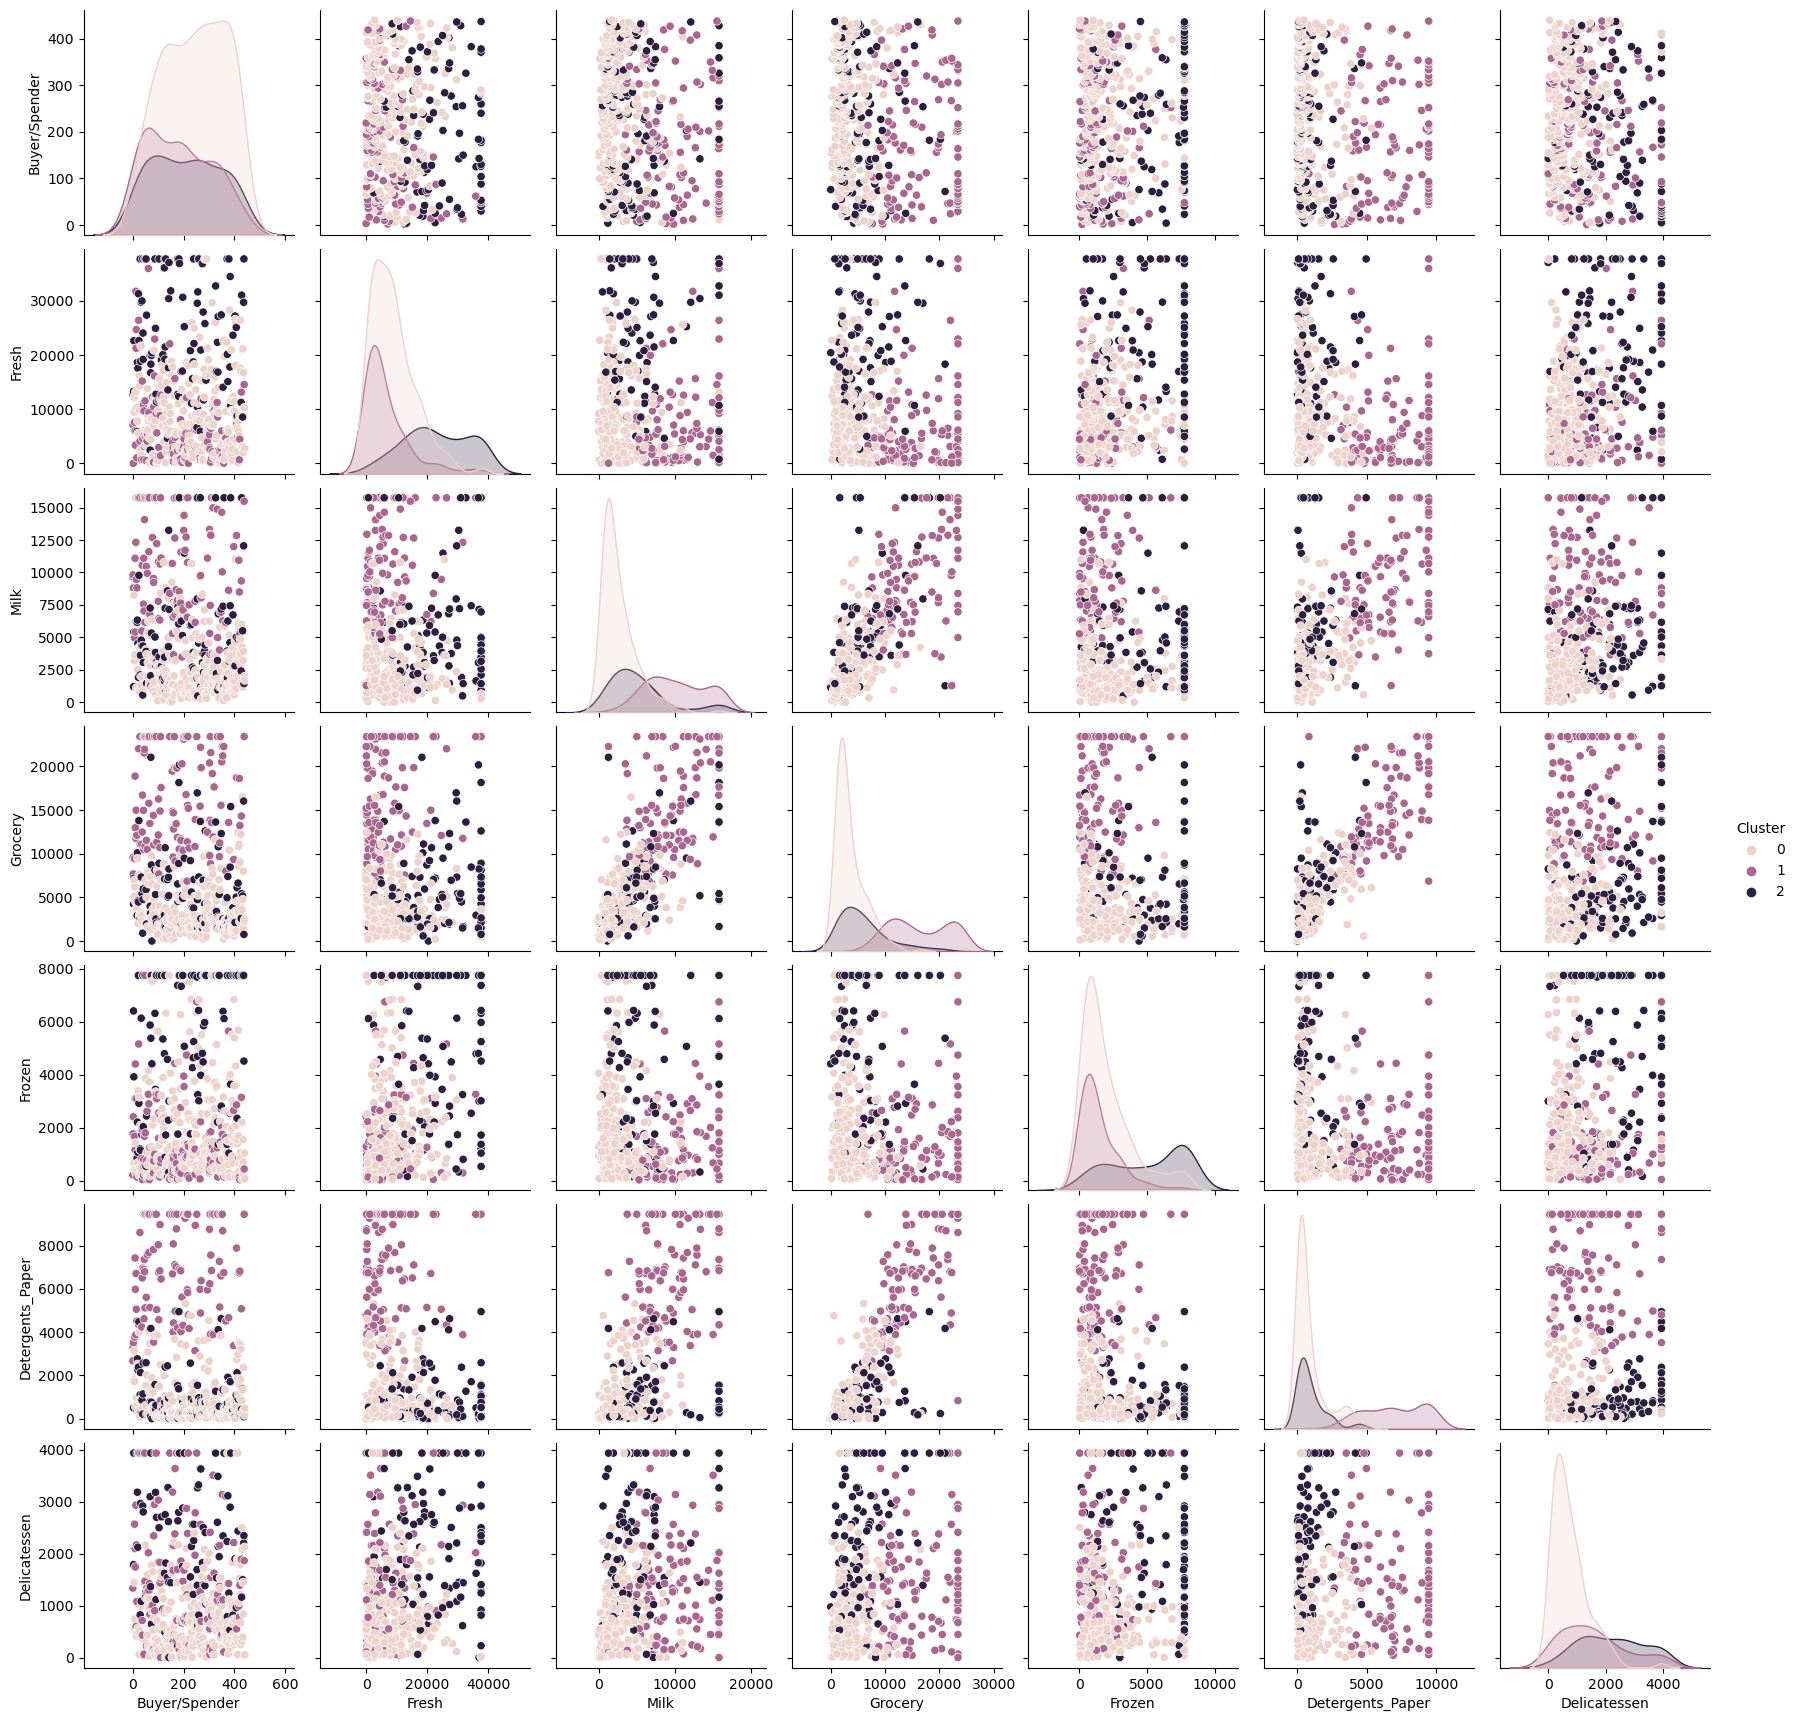

In [47]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11, 1), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

print(df)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
plt.show()


* What are the characteristics of the top 10% spenders in each category?

In [53]:
grouped_data = df.groupby('Channel').sum()
top_10_percent = grouped_data.sort_values(by="Grocery", ascending=False).head(int(len(grouped_data) * 0.1))

top_spenders = df[df['Channel'].isin(top_10_percent.index)]
average_features = top_spenders.mean(numeric_only=True)
print(average_features)


Buyer/Spender      NaN
Fresh              NaN
Milk               NaN
Grocery            NaN
Frozen             NaN
Detergents_Paper   NaN
Delicatessen       NaN
Cluster            NaN
dtype: float64


* How do spending patterns differ between high spenders and low spenders?

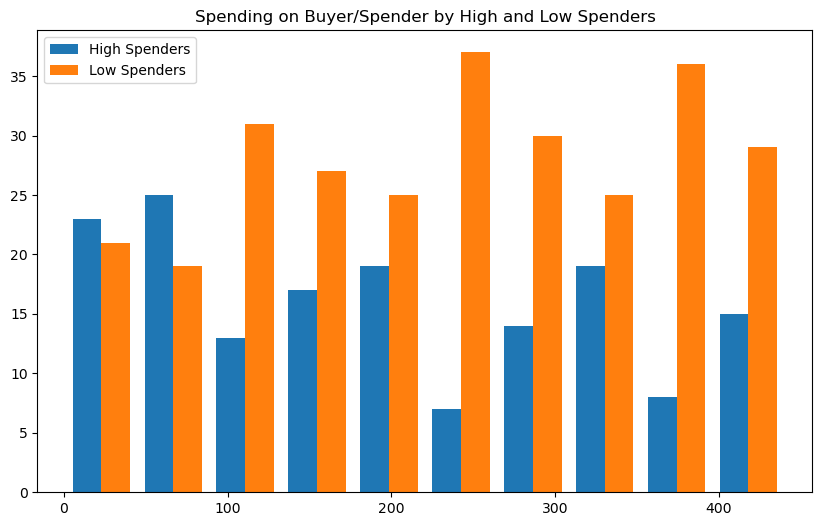

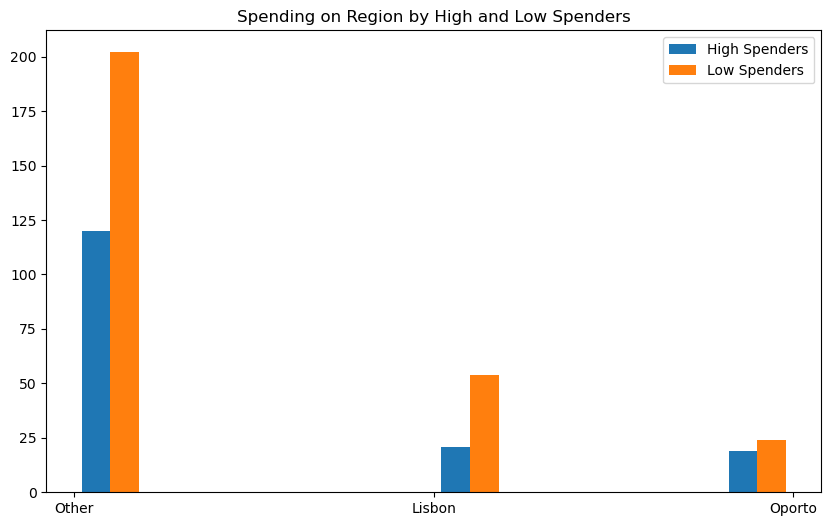

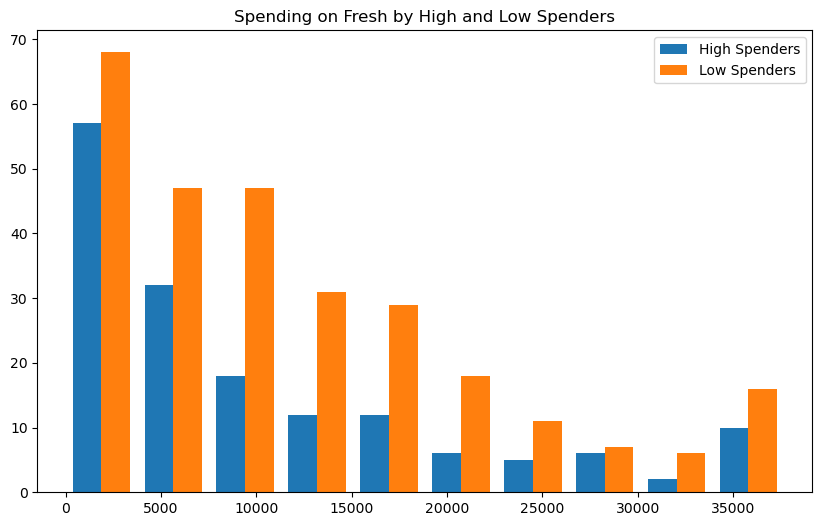

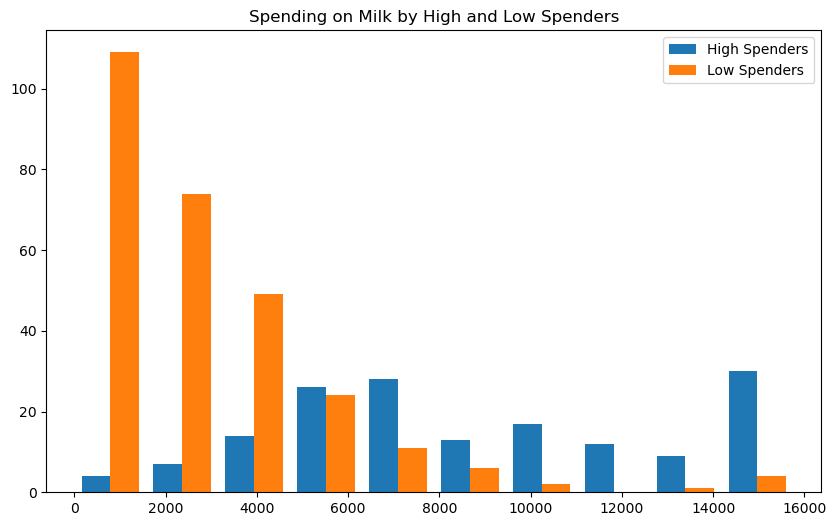

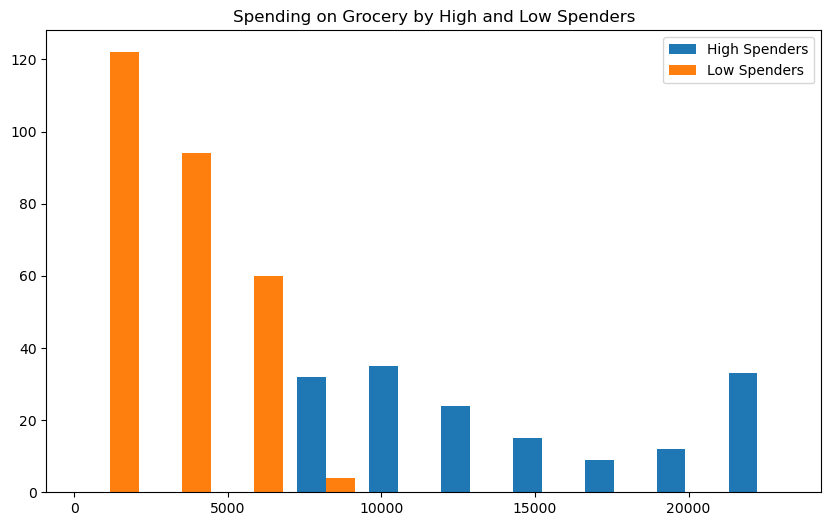

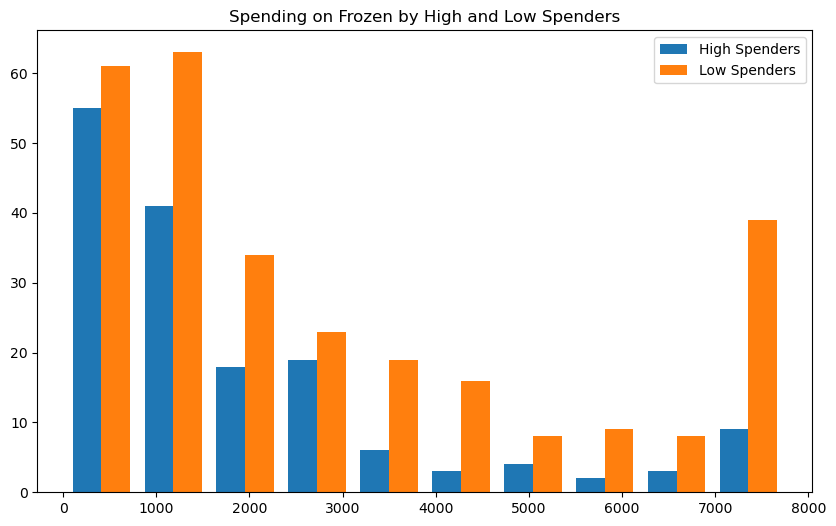

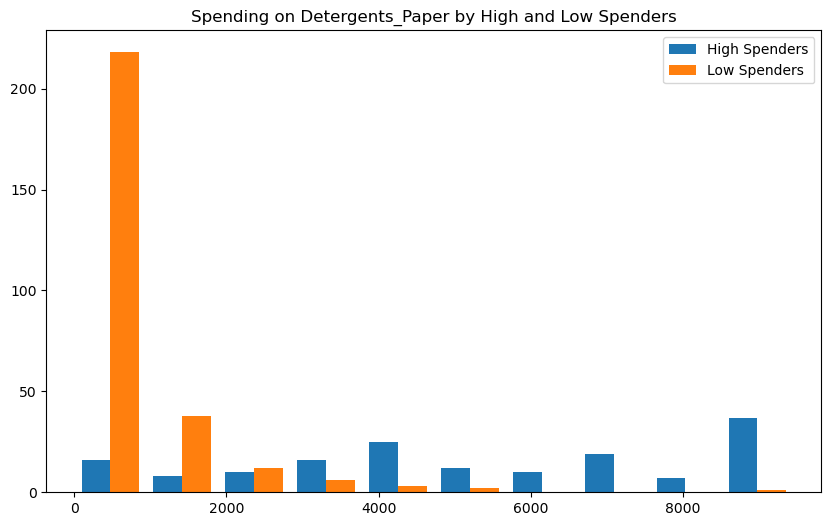

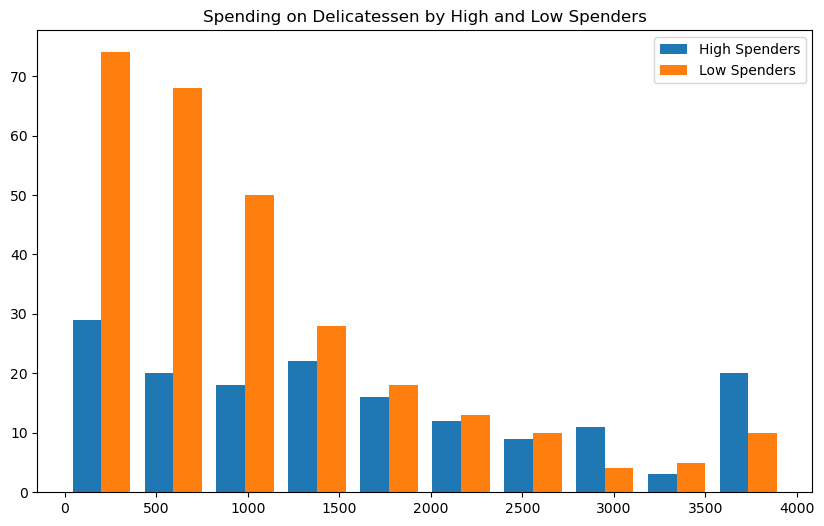

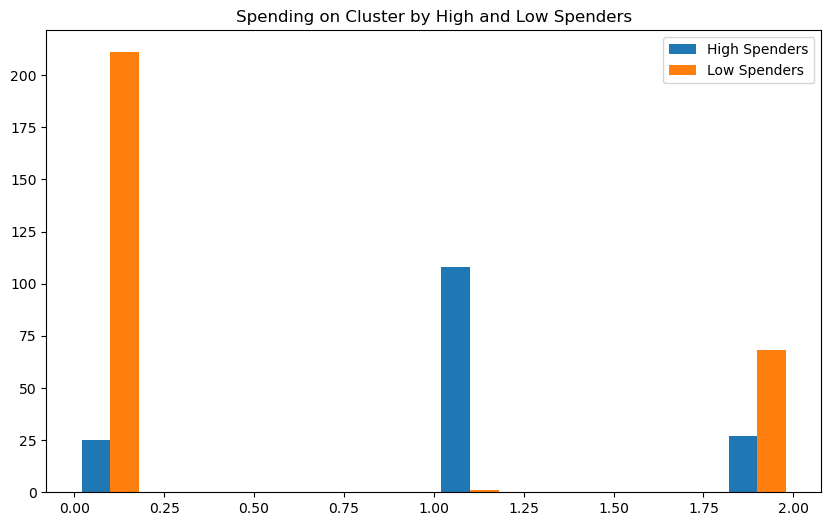

In [54]:
high_spenders = df[df['Grocery'] > df['Grocery'].mean()]
low_spenders = df[df['Grocery'] <= df['Grocery'].mean()]

# Compare spending patterns
for item in df.columns:
  if item != 'Channel':
    plt.figure(figsize=(10, 6))
    plt.title(f'Spending on {item} by High and Low Spenders')
    plt.hist([high_spenders[item], low_spenders[item]], bins=10, label=['High Spenders', 'Low Spenders'])
    plt.legend()
    plt.show()


##  5.Cross-Category Analysis

* Is there a correlation between spending on Milk and Grocery?

In [55]:
correlation = df['Milk'].corr(df['Grocery'])
print(f"Correlation between spending on Milk and Grocery: {correlation}")

Correlation between spending on Milk and Grocery: 0.7737423597168179


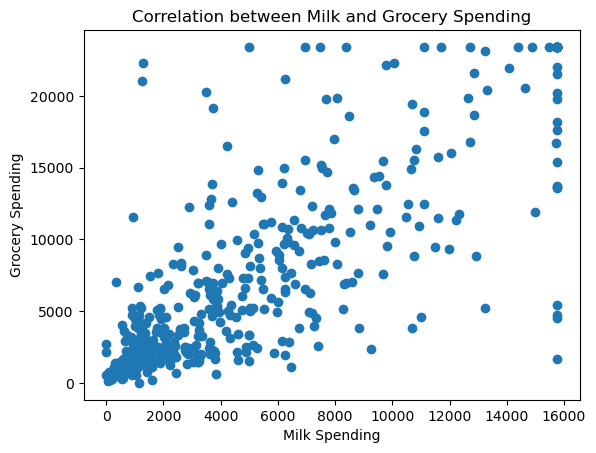

In [56]:
milk = data['Milk']
grocery = data['Grocery']

# Create a scatter plot
plt.scatter(milk, grocery)

plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.title('Correlation between Milk and Grocery Spending')
plt.show()

* Do buyers who spend more on Delicatessen also spend more on Frozen food?

In [57]:
correlation = data['Delicatessen'].corr(data['Frozen'])
print("Correlation between Delicatessen and Frozen:", correlation)


Correlation between Delicatessen and Frozen: 0.22961118566886068


* What is the combined average spending on Fresh and Milk for each region?

In [58]:
data['Combined_Spending'] = data['Fresh'] + data['Milk']
average_spending = data.groupby('Region')['Combined_Spending'].mean()
print(average_spending)

Region
Lisbon    15676.431667
Oporto    15113.130814
Other     16732.640140
Name: Combined_Spending, dtype: float64


##  6.Demand Trends

* Which region has the fastest growing spending on Fresh Vegetables?

In [59]:
df['Fresh_Growth'] = (df['Fresh'] - df.groupby('Region')['Fresh'].transform('mean')) / df.groupby('Region')['Fresh'].transform('mean')
fastest_growing_region = df.groupby('Region')['Fresh_Growth'].mean().sort_values(ascending=False).index[0]
print(f"Region with the fastest growing spending on Fresh Vegetables: {fastest_growing_region}")


Region with the fastest growing spending on Fresh Vegetables: Other


* How does the total spending on Grocery change across regions over time (if time data is available)?

In [61]:
region_growth = df.groupby('Region')['Fresh'].agg(['sum', 'mean']).pct_change().sort_values(by='mean', ascending=False)
print("Fastest Growing Spending on Fresh Vegetables by Region:")
print(region_growth)

# Total spending on Grocery by region over time (if time data is available)
if 'Time' in data.columns:
  grocery_spending = df.groupby(['Region', 'Time'])['Grocery'].sum().unstack()
  plt.figure(figsize=(10, 6))
  plt.plot(grocery_spending.index, grocery_spending.values.T)
  plt.xlabel('Time')
  plt.ylabel('Total Spending on Grocery')
  plt.legend(grocery_spending.columns, title='Region')
  plt.title('Total Spending on Grocery by Region over Time')
  plt.show()
else:
  print("Time data not available in the provided dataset.")

Fastest Growing Spending on Fresh Vegetables by Region:
             sum      mean
Region                    
Other   7.666870  0.157377
Oporto -0.460788 -0.059514
Lisbon       NaN       NaN
Time data not available in the provided dataset.


* What is the average spending per buyer in each category over a specified time period (if time data is available)?

In [70]:
if 'Time' in df.columns:
 
  df['Year'] = pd.to_datetime(df['Time']).dt.year
  df['Month'] = pd.to_datetime(df['Time']).dt.month
  grouped_data = df.groupby(['Year', 'Month', 'Channel'])
  average_spending = grouped_data['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].mean()

  print(average_spending)
else:
  print("Time data is not available in the provided dataset.")


Time data is not available in the provided dataset.


## 7.Buyer Insights

* What is the repeat purchase rate for buyers who spend above the average in at least three categories?

In [66]:
average_spending = df.mean(axis=0)
high_spenders = df[df.gt(average_spending, axis=1).sum(axis=1) >= 3]

repeat_purchase_rate = high_spenders['Channel'].value_counts(normalize=True)[1] * 100
print("Repeat purchase rate for high spenders:", repeat_purchase_rate)

Repeat purchase rate for high spenders: 46.391752577319586


* How many buyers spend consistently (i.e., similar amounts) across all categories?

In [68]:
customer_std_devs = df.std(axis=1)
consistency_threshold = 1.5
consistent_buyers = customer_std_devs[customer_std_devs <= consistency_threshold]
num_consistent_buyers = len(consistent_buyers)
print(f"Number of consistent buyers: {num_consistent_buyers}")

Number of consistent buyers: 0


* Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?

In [69]:
variances = df.groupby('Region').var()

most_diverse_region = variances.mean(axis=1).idxmax()

print(f"Region with the most diverse spending patterns: {most_diverse_region}")


Region with the most diverse spending patterns: Other
